In [99]:
import pandas as pd
import seaborn as sns
import plotly
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
from datetime import datetime


import matplotlib.pyplot as plt
from collections import Counter
from plotly.subplots import make_subplots

In [143]:
df = pd.read_csv('/Users/zhuoqi/Downloads/Q4.csv')
fd = pd.read_csv('/Users/zhuoqi/Downloads/Q6.csv')


In [79]:
df.head(10)

,month,average_amount,category_name
0,2019-03,2650,Apparel
1,2019-04,2180,Apparel
2,2019-04,1010,Book
3,2019-04,4480,Electronics
4,2019-05,2975,Apparel
5,2019-05,680,Book
6,2019-05,5600,Electronics
7,2019-06,3003,Apparel
8,2019-06,1305,Book
9,2019-06,4342,Electronics


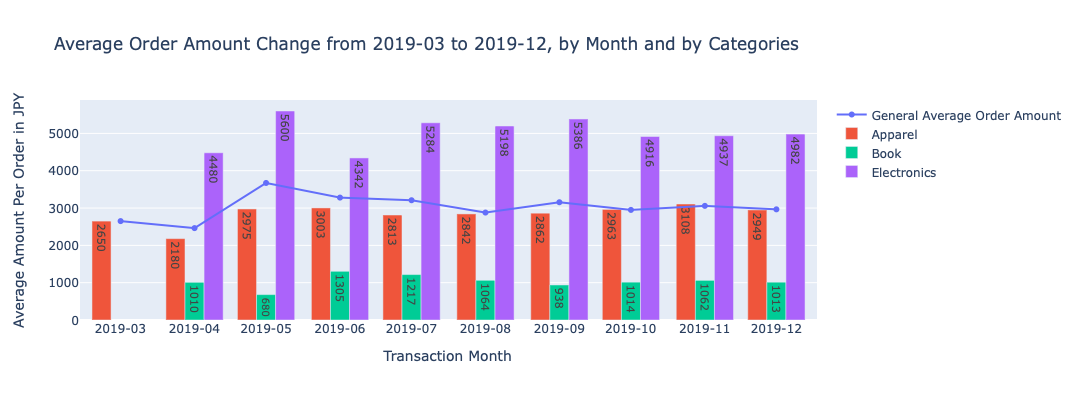

In [215]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=fd['month'], 
                         y=fd['average_amount'], 
                         name='General Average Order Amount',
                         mode='lines+markers',))

month = ['2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12']

fig.add_trace(go.Bar(name='Apparel', 
                     x=df.query('category_name == "Apparel"')['month'], 
                     y=df.query('category_name == "Apparel"')['average_amount'], 
                     text=df.query('category_name == "Apparel"')['average_amount'],
                     textposition='auto'))
fig.add_trace(go.Bar(name='Book', 
                     x=df.query('category_name == "Book"')['month'], 
                     y=df.query('category_name == "Book"')['average_amount'],
                     text=df.query('category_name == "Book"')['average_amount'],
                     textposition='auto'))
fig.add_trace(go.Bar(name='Electronics', 
                     x=df.query('category_name == "Electronics"')['month'], 
                     y=df.query('category_name == "Electronics"')['average_amount'],
                     text=df.query('category_name == "Electronics"')['average_amount'],
                     textposition='auto'))


# 柱状图模式需要设置：4选1
fig.update_layout(barmode='group') 

fig.update_xaxes(title_text='Transaction Month')
# fig.update_xaxes(
#     dtick="M1",
#     tickformat="%b\n%Y")
fig.update_yaxes(title_text='Average Amount Per Order in JPY')
fig.update_layout(height=400, width=1100,
    title="Average Order Amount Change from 2019-03 to 2019-12, by Month and by Categories")
fig.update_layout(xaxis=dict(
                    tickmode = 'array',
                    tickvals = df['month'],
                    ticktext = df['month']))

fig.show()
# pio.write_image(fig, '/Users/zhuoqi/Desktop/fig2.png')

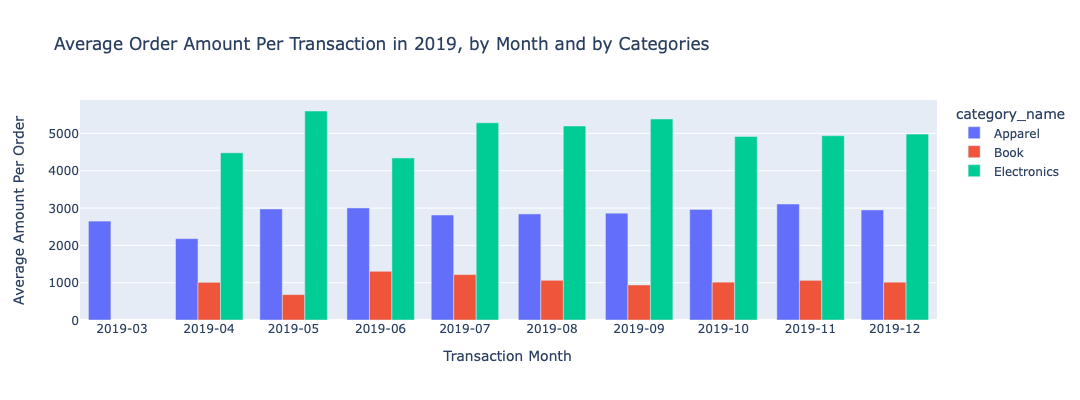

In [159]:
fig = px.bar(df, x="month", y="average_amount",
             color='category_name', barmode='group',
             height=400,
            title='Average Order Amount Per Transaction in 2019, by Month and by Categories')
fig.update_xaxes(title_text='Transaction Month')
# fig.update_xaxes(
#     dtick="M1",
#     tickformat="%b\n%Y")
fig.update_yaxes(title_text='Average Amount Per Order')

fig.update_layout(xaxis=dict(
                    tickmode = 'array',
                    tickvals = df['month'],
                    ticktext = df['month']))

fig.show()
# fig.write_image("/Users/zhuoqi/Desktop/fig1.png")

# pio.write_image(fig, '/Users/zhuoqi/Desktop/fig1.png', width=1280, height=720)

In [190]:
df2 = pd.read_csv('/Users/zhuoqi/Downloads/Q51.csv')
df2.head(10)

,buyer_created_month,Amount
0,2019-01,125430
1,2019-02,79740
2,2019-03,119240
3,2019-04,88710
4,2019-05,99720
5,2019-06,98710
6,2019-07,106880
7,2019-08,70960
8,2019-09,56720


In [191]:
df3

,transactions_month,Amount
0,2019-07,125170
1,2019-08,247610
2,2019-09,473330


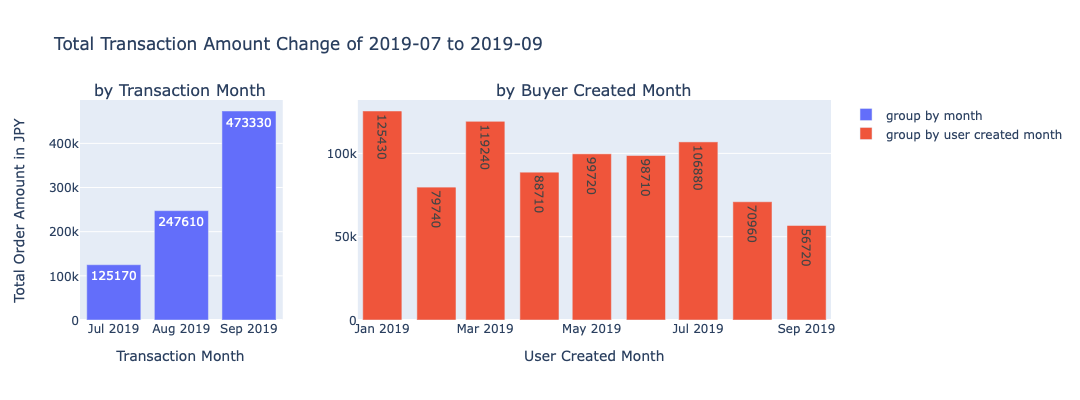

In [208]:
fig = make_subplots(rows=1, cols=2, column_widths=[0.3, 0.7],
                   subplot_titles=("by Transaction Month", "by Buyer Created Month"))
# Add traces
fig.add_trace(go.Bar(x=df3['transactions_month'], y=df3['Amount'],
                    name='group by month', 
                    text=df3['Amount'],
                    textposition='auto'), row=1, col=1)

fig.add_trace(go.Bar(x=df2['buyer_created_month'], y=df2['Amount'], text=df2['Amount'],
                    name='group by user created month'), row=1, col=2)

# fig.add_trace(go.Scatter(x=df2.query('buyer_created_month == "2019-02"')['transactions_month'], y=df2.query('buyer_created_month == "2019-02"')['Amount'],
#                     mode='markers+lines',
#                     name='2019-02'), row=1, col=2)


fig.update_xaxes(title_text="Transaction Month", row=1, col=1)
fig.update_xaxes(title_text="User Created Month", row=1, col=2)

fig.update_yaxes(title_text="Total Order Amount in JPY", row=1, col=1)

fig.update_layout(height=400, width=1000,
    title="Total Transaction Amount Change of 2019-07 to 2019-09")



fig.show()
# pio.write_image(fig, '/Users/zhuoqi/Desktop/fig1.png', width=1000, height=400)

In [224]:
dff = pd.read_csv('/Users/zhuoqi/Downloads/Q5.csv')
dff.head()

,buyer_created_month,transactions_month,Amount
0,2019-01,2019-07,13280
1,2019-02,2019-07,11370
2,2019-03,2019-07,34950
3,2019-04,2019-07,7110
4,2019-05,2019-07,12710


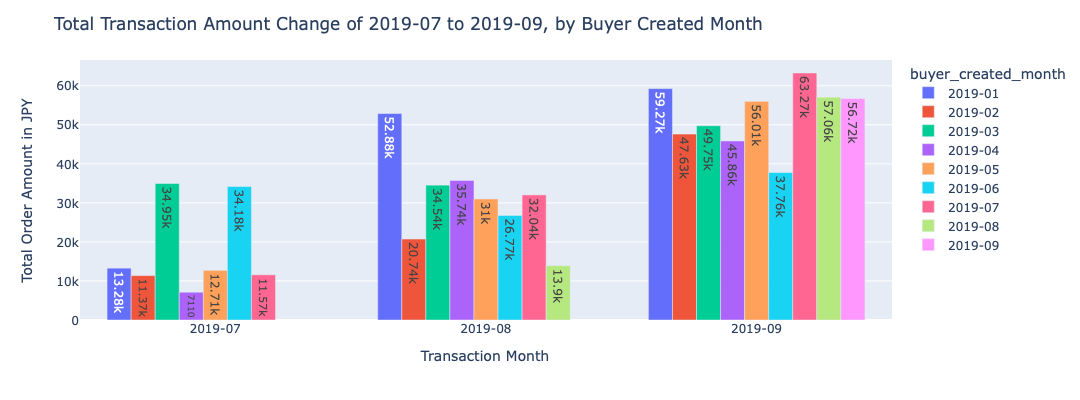

In [238]:
fig = px.bar(dff, 
             x='transactions_month', 
             y='Amount',
             color='buyer_created_month', barmode='group',
             text='Amount',
             text_auto=True)


month = ['2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12']




fig.update_xaxes(title_text='Transaction Month')
fig.update_yaxes(title_text="Total Order Amount in JPY")
fig.update_layout(height=400, width=1000,
    title="Total Transaction Amount Change of 2019-07 to 2019-09, by Buyer Created Month")

fig.update_layout(xaxis=dict(
                    tickmode = 'array',
                    tickvals = df['month'],
                    ticktext = df['month']))

fig.show()
# pio.write_image(fig, '/Users/zhuoqi/Desktop/fig3.png')

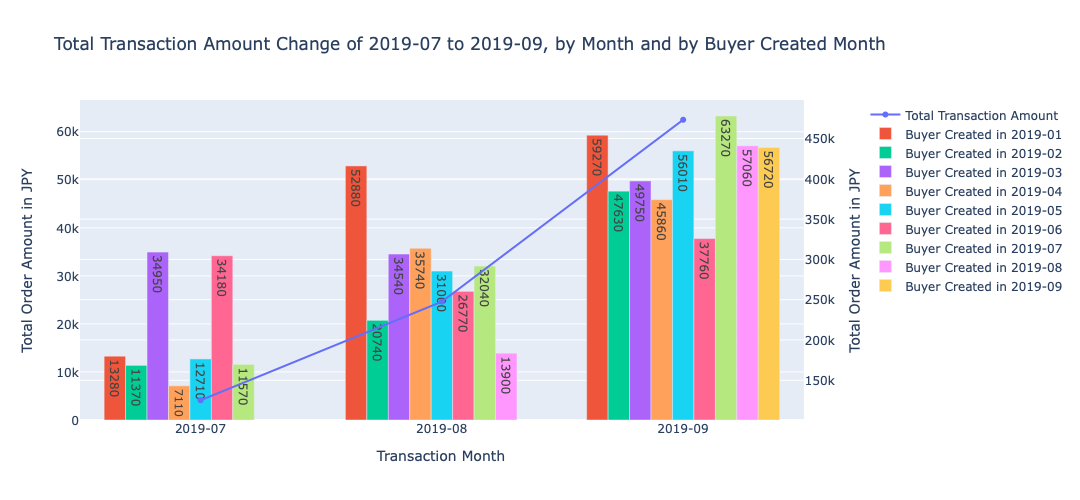

In [255]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(x=df3['transactions_month'], 
                         y=df3['Amount'], 
                         name='Total Transaction Amount',
                         mode='lines+markers'), secondary_y=True)

fig.add_trace(go.Bar(name='Buyer Created in 2019-01', 
             x=dff.query('buyer_created_month == "2019-01"')['transactions_month'], 
             y=dff.query('buyer_created_month == "2019-01"')['Amount'],
             text=dff.query('buyer_created_month == "2019-01"')['Amount'],
             textposition='auto'), secondary_y=False)
fig.add_trace(go.Bar(name='Buyer Created in 2019-02', 
             x=dff.query('buyer_created_month == "2019-02"')['transactions_month'], 
             y=dff.query('buyer_created_month == "2019-02"')['Amount'],
             text=dff.query('buyer_created_month == "2019-02"')['Amount'],
             textposition='auto'), secondary_y=False)
fig.add_trace(go.Bar(name='Buyer Created in 2019-03', 
             x=dff.query('buyer_created_month == "2019-03"')['transactions_month'], 
             y=dff.query('buyer_created_month == "2019-03"')['Amount'],
             text=dff.query('buyer_created_month == "2019-03"')['Amount'],
             textposition='auto'), secondary_y=False)
fig.add_trace(go.Bar(name='Buyer Created in 2019-04', 
             x=dff.query('buyer_created_month == "2019-04"')['transactions_month'], 
             y=dff.query('buyer_created_month == "2019-04"')['Amount'],
             text=dff.query('buyer_created_month == "2019-04"')['Amount'],
             textposition='auto'), secondary_y=False)
fig.add_trace(go.Bar(name='Buyer Created in 2019-05', 
             x=dff.query('buyer_created_month == "2019-05"')['transactions_month'], 
             y=dff.query('buyer_created_month == "2019-05"')['Amount'],
             text=dff.query('buyer_created_month == "2019-05"')['Amount'],
             textposition='auto'), secondary_y=False)
fig.add_trace(go.Bar(name='Buyer Created in 2019-06', 
             x=dff.query('buyer_created_month == "2019-06"')['transactions_month'], 
             y=dff.query('buyer_created_month == "2019-06"')['Amount'],
             text=dff.query('buyer_created_month == "2019-06"')['Amount'],
             textposition='auto'), secondary_y=False)
fig.add_trace(go.Bar(name='Buyer Created in 2019-07', 
             x=dff.query('buyer_created_month == "2019-07"')['transactions_month'], 
             y=dff.query('buyer_created_month == "2019-07"')['Amount'],
             text=dff.query('buyer_created_month == "2019-07"')['Amount'],
             textposition='auto'), secondary_y=False)
fig.add_trace(go.Bar(name='Buyer Created in 2019-08', 
             x=dff.query('buyer_created_month == "2019-08"')['transactions_month'], 
             y=dff.query('buyer_created_month == "2019-08"')['Amount'],
             text=dff.query('buyer_created_month == "2019-08"')['Amount'],
             textposition='auto'), secondary_y=False)
fig.add_trace(go.Bar(name='Buyer Created in 2019-09', 
             x=dff.query('buyer_created_month == "2019-09"')['transactions_month'], 
             y=dff.query('buyer_created_month == "2019-09"')['Amount'],
             text=dff.query('buyer_created_month == "2019-09"')['Amount'],
             textposition='auto'), secondary_y=False)






fig.update_xaxes(title_text='Transaction Month')
fig.update_yaxes(title_text="Total Order Amount in JPY")
fig.update_layout(height=500, width=1020,
    title="Total Transaction Amount Change of 2019-07 to 2019-09, by Month and by Buyer Created Month")

fig.update_layout(xaxis=dict(
                    tickmode = 'array',
                    tickvals = df['month'],
                    ticktext = df['month']))

fig.show()
# pio.write_image(fig, '/Users/zhuoqi/Desktop/fig3.png')